In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt

device = 'cuda'

Nx = Ny = 100
k = 10 * torch.pi / 100

o = torch.zeros((Nx, Ny))
o = o.to(device)
o += torch.sin(k * torch.arange(Nx)).to(device) / torch.cos(k * torch.arange(Ny)).unsqueeze(-1).to(device)
print(o.device)

# test fft
o.requires_grad_()
o_f = torch.fft.fft2(o)

l = o_f.real.abs().sum()
torch.autograd.backward(l)

o.grad

cuda:0


tensor([[ -8.0000,  -2.3511,  -2.7639,  ...,   3.8042,  -2.7639,  -2.3511],
        [ 37.5958, -29.4622,  41.9208,  ..., -20.8824,  28.7474, -16.2990],
        [ -6.4721,  -2.4899,  -1.1180,  ...,   4.6165,  -3.3541,  -1.3143],
        ...,
        [-34.0561,  43.1156, -13.5534,  ...,  43.9098, -20.2098,  43.0086],
        [ -6.4721,  -1.3143,  -3.3541,  ...,   1.5388,  -1.1180,  -2.4899],
        [ 37.5958, -16.2990,  28.7474,  ...,   4.6958,  41.9208, -29.4622]],
       device='cuda:0')

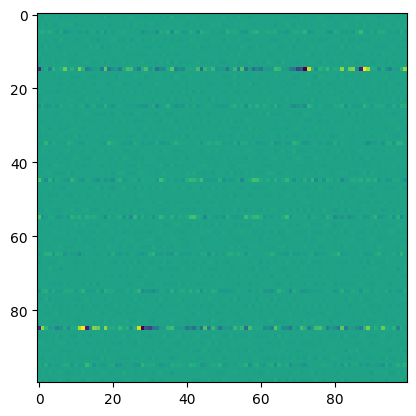

In [45]:
fig, ax = plt.subplots(1, 1)
ax.imshow(o.grad.cpu().numpy())